# Biotech Webpage Embeddings
Attempting to build an embedding map of the biotech landscape. 

### Imports

In [2]:
# Basics
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import html
import string

# Scraping
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
import scrapy

# WordCloud, Plotting
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
import plotly
import sklearn

# Database
import sqlite3
import openai
from openai.embeddings_utils import get_embedding, cosine_similarity

In [3]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
driver.implicitly_wait(0.5)

### Extract Text

In [4]:
# Load the page with Selenium to let the JS-dependent elements load
url = 'https://latch.bio/'
driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract the text from the page
text = soup.get_text(separator=' ')
cleaned_text = text.replace('\n', '')

In [6]:
# Visualizing the text with a Word Cloud
# Tokenizing the text
tokens = word_tokenize(cleaned_text)
words = [word.lower() for word in tokens]

# Cleaning
stopwords = nltk.corpus.stopwords.words('english')
cleaned_words = [w for w in words if w not in stopwords and w not in string.punctuation]

In [7]:
freqs = nltk.FreqDist(cleaned_words)
freqs.most_common(20)

[('latch', 15),
 ('bioinformatics', 10),
 ('workflows', 9),
 ('data', 9),
 ('infrastructure', 7),
 ('→', 6),
 ('sdk', 6),
 ('us', 5),
 ('run', 5),
 ('workflow', 5),
 ('announcing', 4),
 ('aws', 4),
 ('use', 4),
 ('cases', 4),
 ('therapy', 4),
 ('sign', 4),
 ('request', 4),
 ('demo', 4),
 ('free', 4),
 ('platform', 4)]

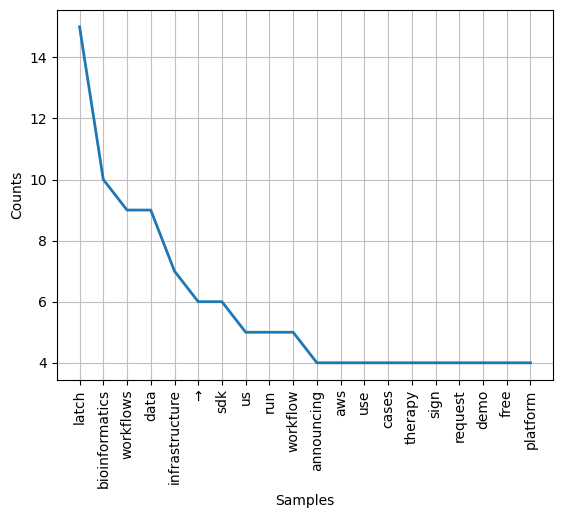

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
freqs.plot(20)

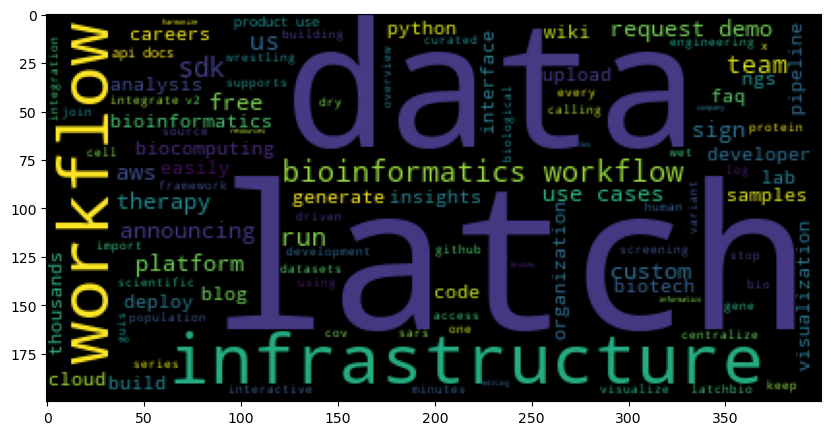

In [9]:
res = ' '.join(cleaned_words)
wordcloud = WordCloud(max_words=100).generate(res)
plt.subplots(figsize=(10,10))
plt.imshow(wordcloud)

In [10]:
embedding = get_embedding(
    text=cleaned_text,
    engine='text-embedding-ada-002'
)

In [11]:
len(embedding)

1536

### Save Results in SQLite3 Database
Saving 
1) Top 20 words by frequency
2) page embeddings
